# YOLOv8

In this project, YOLOv8 is use to train the model for staplet detection.
You can check [Ultralytics documentation](https://docs.ultralytics.com/) for more details or [Github repo](https://github.com/ultralytics/ultralytics)

In [1]:
!nvidia-smi

Mon Jan 29 21:35:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.146.02             Driver Version: 535.146.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti     Off | 00000000:08:00.0  On |                  N/A |
| 16%   49C    P5              44W / 260W |    622MiB / 11264MiB |     32%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0


### Import dependencies

In [1]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import random

### First let's check the dataset

In [2]:

path_to_train_images = '../data2/train/images/'
path_to_train_labels = '../data2/train/labels/'

# Get a list of image files
image_files = [f for f in os.listdir(path_to_train_images) if f.endswith('.png') or f.endswith('.jpg')]

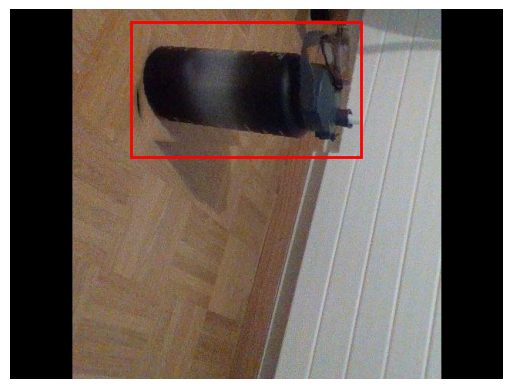

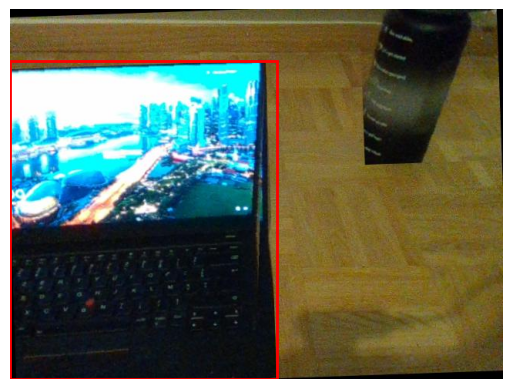

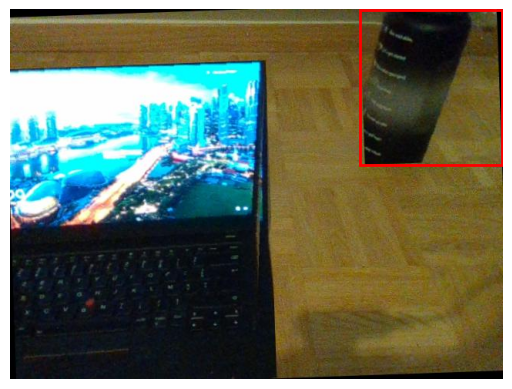

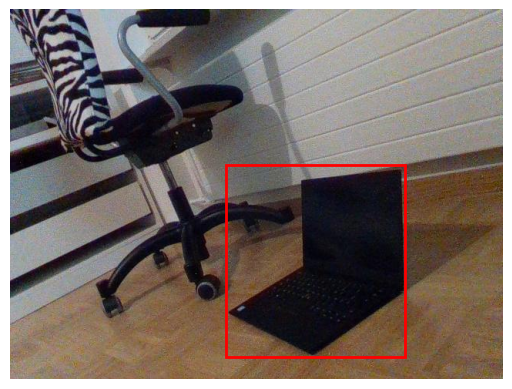

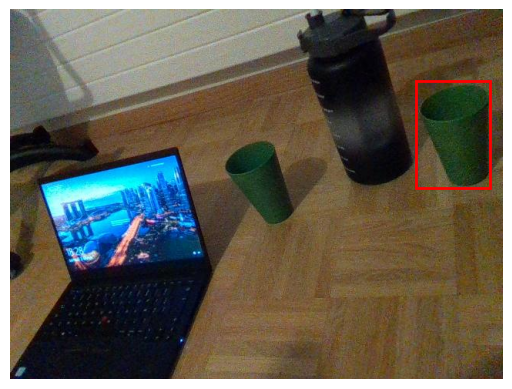

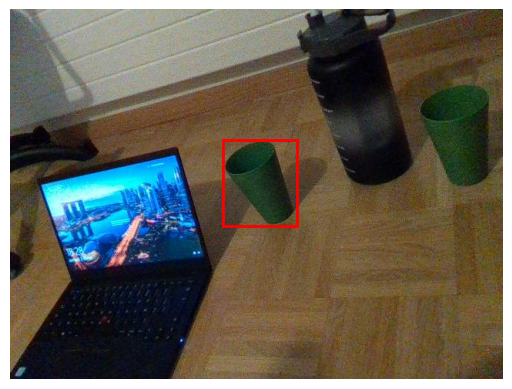

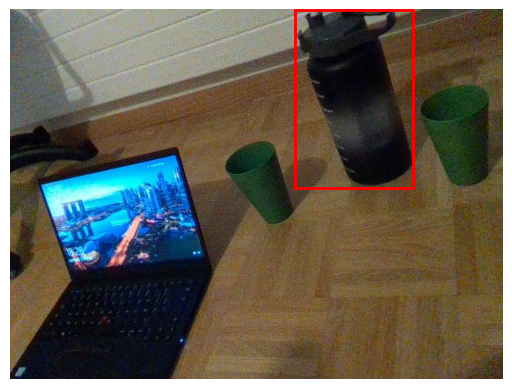

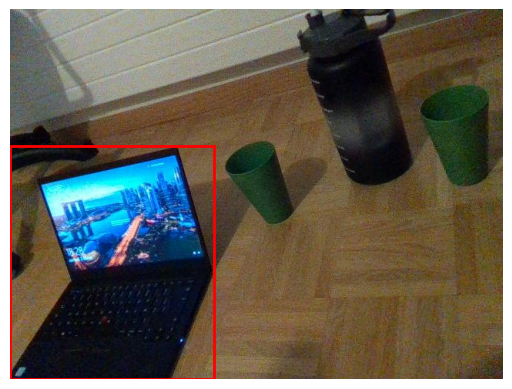

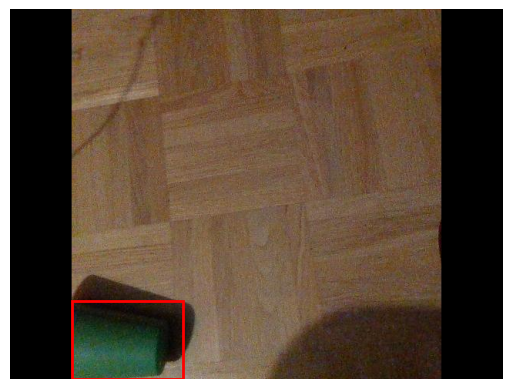

In [3]:
# Check if there are enough images to sample
if len(image_files) >= 5:
    # Choose 5 random images
    random_images = random.sample(image_files, 5)

    # Plot each random image with its annotations
    for image_file in random_images:
        image_path = os.path.join(path_to_train_images, image_file)
        label_path = os.path.join(path_to_train_labels, image_file.replace('.png', '.txt').replace('.jpg', '.txt'))

        # Load the image using OpenCV
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Read label file and extract bounding box coordinates
        with open(label_path, 'r') as label_file:
            lines = label_file.readlines()
            annotations = [list(map(float, line.strip().split()[1:])) for line in lines]

        # Convert annotations to pixel coordinates
        height, width, _ = img.shape
        for annotation in annotations:
            x, y, w, h = annotation
            x = int(x * width)
            y = int(y * height)
            w = int(w * width)
            h = int(h * height)

            # Draw bounding box on the image using Matplotlib
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.gca().add_patch(plt.Rectangle((x - w // 2, y - h // 2), w, h, linewidth=2, edgecolor='r', facecolor='none'))
            plt.show()

else:
    print("Not enough images to sample.")

### Let's train the model

We're using the smallest model `yolov8s`. Depending on you data and aimed accuracy, you can use `yolov8n`, `yolov8m`, `yolov8l` or `yolov8x`

In [2]:
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)
results = model.train(data='/home/saf/Documents/workspace/FusionVision_Elite/data2/data.yaml', epochs=300, imgsz=640, device=[0])

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11009MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/saf/Documents/workspace/FusionVision_Elite/data2/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

In [7]:
# Load model
model = YOLO('../yolo_train/runs/detect/train/weights/best.pt')

# Run inference
results = model.predict('../dataset/1705069475005.png', save=True, conf=0.5)



image 1/1 /home/saf/Documents/workspace/3d_object_recognition/yolo_train/../dataset/1705069475005.png: 480x640 1 cup, 7.7ms
Speed: 0.9ms preprocess, 7.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


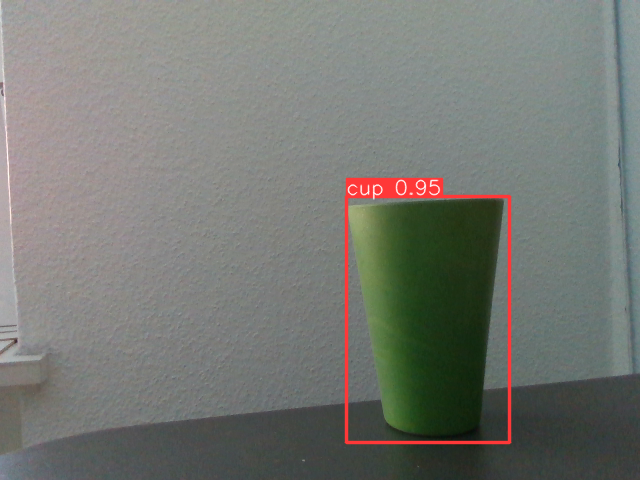

In [8]:
from IPython.display import Image
import os

image_path = os.path.join('../yolo_train/runs/detect/predict', '1705069475005.png')

# Check if the file exists
if os.path.isfile(image_path):
    img = Image(filename=image_path)
    display(img)
else:
    print('Image file not found.')